#Predicting house prices: a regression example

Loading the Boston housing dataset

In [1]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

Using TensorFlow backend.


Normalizing the data

In [2]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

print(train_data.shape[1])

13


Model definition

In [0]:
from keras import models
from keras import layers

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop',
                loss='mse',
                metrics=['mae'])
  return model

K-fold validation

In [0]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k  # // means integer division: 4//3 = 1
# num_epochs = 100
# all_scores = []
# for i in range(k):
#   print('processing fold #', i)
#   val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
#   val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]

#   partial_train_data = np.concatenate(
#     [train_data[:i * num_val_samples],
#      train_data[(i+1) * num_val_samples:]],
#     axis = 0)

#   partial_train_targets = np.concatenate(
#     [train_targets[:i * num_val_samples],
#      train_targets[(i + 1) * num_val_samples:]],
#     axis=0)

#   model = build_model()
#   model.fit(partial_train_data, partial_train_targets,
#             epochs=num_epochs, batch_size=1, verbose=0)
#   val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
#   all_scores.append(val_mae)

Saving the validation logs at each fold and raising the num of epochs

In [5]:
num_epochs = 500
all_mean_histories = []
for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]

  partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
     train_data[(i+1) * num_val_samples:]],
    axis = 0)

  partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
     train_targets[(i + 1) * num_val_samples:]],
    axis=0)

  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets,
            validation_data=(val_data, val_targets),
            epochs=num_epochs, batch_size=1, verbose=0)
  mae_history = history.history['val_mean_absolute_error']
  all_mean_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
[4.027746767100721, 3.109761143674945, 2.964025053647485, 2.766243080101391, 2.614269001649158, 2.8297005832785427, 2.1780430916512366, 2.2123985998701343, 2.407853598641877, 2.476756992906627, 2.643721174485613, 2.1944282645046123, 2.3530890681956076, 1.9887584790144817, 2.092358098171725, 2.1393831507994396, 2.3190709482325187, 2.237223304144227, 2.057905848663632, 2.2349449006637725, 2.23527720423028, 1.9783833569819385, 1.990415388994878, 1.9597616006832312, 2.481060179153291, 2.0975853145712673, 2.080493190500996, 2.5343385545334014, 2.2592509996772994, 2.0759854741615826, 1.8412666131954383, 1.9159378108411733, 2.132538106181834, 1.8849762170621664, 1.9405785173472792, 2.088605219774907, 2.2074371658929506, 2.003961270398433, 2.0736109006522905, 2.018076783359641, 2.2315223146193097, 2.156600602782599, 2.080544344269403, 2.126697115378805, 2.006287924133905, 2.008688407369179, 2.1311710376550654, 2.07

Building the history of successive mean K-fold validation scores

In [0]:
average_mae_history = [np.mean([x[i] for x in all_mean_histories]) for i in range(num_epochs)]

Plotting validation scores

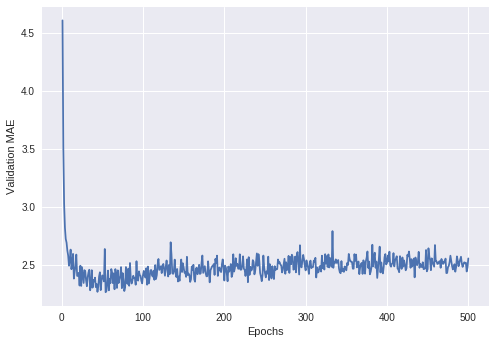

In [14]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) +1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

Plotting validation scores, excluding the first 10 data points

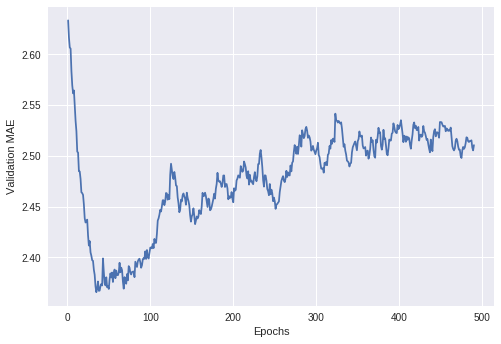

In [15]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) +1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

Training the final model

In [16]:
model = build_model()
model.fit(train_data, train_targets, 
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
print(test_mae_score)

102/102 [==============================] - 0s 712us/step
2.962073756199257
